# 量子ゲート

In [1]:
# Qiskitライブラリーを導入
from qiskit import *

# 描画のためのライブラリーを導入
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Qiskitバージョンの確認
qiskit.__qiskit_version__

{'qiskit-terra': '0.13.0',
 'qiskit-aer': '0.5.1',
 'qiskit-ignis': '0.3.0',
 'qiskit-ibmq-provider': '0.7.0',
 'qiskit-aqua': None,
 'qiskit': '0.19.1'}

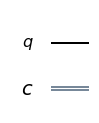

In [3]:
# 1量子ビット回路を用意
q = QuantumCircuit(1,1) 

# 回路を描画
q.draw(output="mpl")

### Hゲート

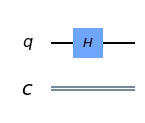

In [4]:
# 量子ゲートで回路を作成
q.h(0)   # Hゲートを0番目の量子ビットに操作します。

# 回路を描画
q.draw(output="mpl")

In [5]:
# 状態ベクトルシミュレーターの実行
vector_sim = Aer.get_backend('statevector_simulator')
job = execute(q, vector_sim )
result = job.result().get_statevector(q, decimals=3)

print(result)

[0.707+0.j 0.707+0.j]


これは、$H|0\rangle= \frac{1}{\sqrt{2}} \begin{pmatrix}
1 & 1 \\\
1 & -1
\end{pmatrix} 
\begin{pmatrix}
1 \\\
0
\end{pmatrix} 
 =\frac{1}{\sqrt{2}}\begin{pmatrix}
1 \\\
1
\end{pmatrix} 
=\begin{pmatrix}
0.707 \\\
0.707
\end{pmatrix} 
=\frac{1}{\sqrt{2}}（|0\rangle+|1\rangle)$ です。

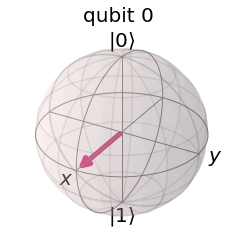

In [6]:
# ブロッホ球での表示
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(result)

### X回転ゲート

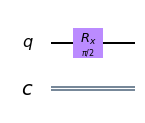

In [7]:
# 数値計算モジュールを導入
import numpy as np

q = QuantumCircuit(1,1)    # 1量子ビット回路を用意

q.rx(np.pi/2,0)    # x軸を中心にπ/2回転

q.draw(output="mpl")    # 回路を描画

In [8]:
# 状態ベクトルシミュレーターの実行
vector_sim = Aer.get_backend('statevector_simulator')
job = execute(q, vector_sim )
result = job.result().get_statevector(q, decimals=3)

print(result)

[0.707+0.j    0.   -0.707j]


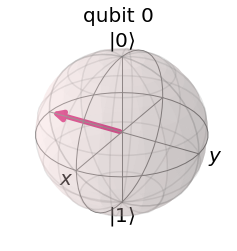

In [9]:
# ブロッホ球での表示
plot_bloch_multivector(result)

### 2量子ビット回路

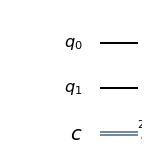

In [10]:
# 2量子ビット回路を用意
q = QuantumCircuit(2,2) 

# 回路を描画
q.draw(output="mpl")

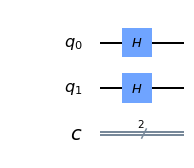

In [11]:
# 量子ゲートで回路を作成
q.h(0)   # Hゲートを0番目の量子ビットに操作します。
q.h(1)   # Hゲートを1番目の量子ビットに操作します。

# 回路を描画
q.draw(output="mpl")

In [12]:
# 状態ベクトルシミュレーターの実行
vector_sim = Aer.get_backend('statevector_simulator')
job = execute(q, vector_sim )
result = job.result().get_statevector(q, decimals=3)

print(result)

[0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]




２量子ビットの状態は、１量子ビットの積（テンソル積）で表せます。

$|q0\rangle \otimes|q1\rangle = (a|0\rangle+b|1\rangle) \otimes (c|0\rangle+d|1\rangle) $

$= ac|0\rangle|0\rangle+ad|0\rangle|1\rangle+bc|1\rangle|0\rangle+bd|1\rangle|1\rangle$

$= ac|00\rangle+ad|01\rangle+bc|10\rangle+bd|11\rangle$

(ただし、$|ac|^2+ |ad|^2+ |bc|^2+ |bd|^2=1$ )


Qiskitの初期値は、$|0\rangle|0\rangle=|00\rangle$なので、$H$をそれぞれの量子ビットに操作させることで均等な重ね合わせの状態になります。

$H|0\rangle \otimes H|0\rangle=\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle) \otimes \frac{1}{\sqrt{2}}(|0\rangle+|1\rangle) = \frac{1}{2}(|00\rangle+|01\rangle+|10\rangle+|11\rangle)$

$$ 
=\frac{1}{2}\left( \begin{bmatrix} 1 \\ 1 \end{bmatrix} \otimes \begin{bmatrix} 1 \\ 1 \end{bmatrix}\right) = \frac{1}{2}\begin{bmatrix} 1 \\ 1 \\ 1 \\ 1 \end{bmatrix}=\frac{1}{2}\left(\begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix}+\begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \end{bmatrix}+\begin{bmatrix} 0 \\ 0 \\ 1 \\ 0 \end{bmatrix}+\begin{bmatrix} 0 \\ 0 \\ 0 \\ 1 \end{bmatrix}\right)
$$

次に、この状態を測定してみましょう。

まず、測定回路を追加します。

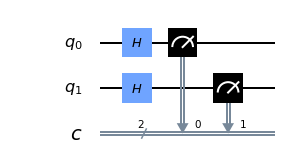

In [13]:
q = QuantumCircuit(2,2)    # 2量子ビット回路を用意

q.h(0)   # Hゲートを0番目の量子ビットに操作します。
q.h(1)   # Hゲートを1番目の量子ビットに操作します。

# 回路を測定
q.measure(0,0)
q.measure(1,1)

# 回路を描画
q.draw(output='mpl')

次にQASMシミュレーター（量子計算シミュレーター）で計算させ、測定します。1024回実行した結果、それぞれの状態が測定された回数を表示し、その測定確率をヒストグラムで表示します。

{'01': 274, '00': 240, '11': 274, '10': 236}


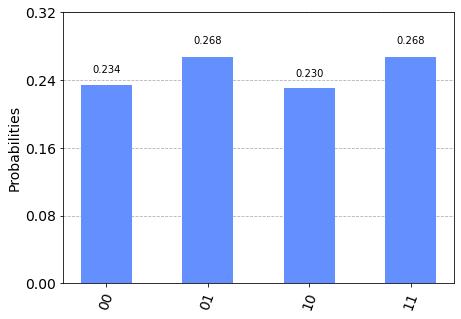

In [14]:
# QASMシミュレーターで実験
simulator = Aer.get_backend('qasm_simulator')
job = execute(q, backend=simulator, shots=1024)
result = job.result()

#  測定された回数を表示
counts = result.get_counts(q)
print(counts)

## ヒストグラムで測定された確率をプロット
from qiskit.visualization import *
plot_histogram( counts )

$|00\rangle$、$|01\rangle$、$|10\rangle$、$|11\rangle$の状態がほぼ25%ずつ均等に測定されました。

## 演習１

(1) 1量子ビット回路で、初期値$|0\rangle$に対してY軸周りの回転ゲートを使って角度π/3の回転を適用してください。（Y軸周りの回転は`ry(回転角,量子ビット)`を使います。）<br>その結果を状態ベクトルシミュレーターで計算し、状態をブロッホ球に表示させてください。<br>



(2) 2量子ビット回路で、$$\frac{1}{\sqrt{2}}|00\rangle + \frac{1}{\sqrt{2}}|11\rangle$$ のエンタングル状態を作り、QASMシミュレーターで実験して、測定結果をヒストグラムで表示してください。<br>
CNOTゲートを0番目の量子ビットを制御ビット、1番目の量子ビットを目標ビットで操作するには、
 `cx(0,1) `を使います。